In [30]:
import numpy as np
import pandas as pd
import plotnine as ptn
from plotnine import *
import pprint

import seaborn as sns

In [31]:
from sklearn import datasets

wine = datasets.load_wine() #Cargando el dataset de vino

print(wine.feature_names) #Analizando las variables que tiene
pd_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

pd_wine.head(2)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [32]:
#Escalando los datos
from sklearn.preprocessing import StandardScaler

wine_scaler = StandardScaler() #Creamos un objeto de la clase StandardScaler
wine_scaled_features = wine_scaler.fit_transform(pd_wine) #Transformamos los datos
wine_scaled_features

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [5]:
#Creando el objeto y aplicando PCA
from sklearn.decomposition import PCA

# Creamos objeto PCA y entrenamos
pca = PCA(n_components=2)
pca.fit(wine_scaled_features)

# Aplicamos PCA a los features escalados (el mismo input del K-means que estamos interpretando)
pca_data = pca.transform(wine_scaled_features)
pca_data = pd.DataFrame(pca_data,columns=["PC1","PC2"])
pca_data

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


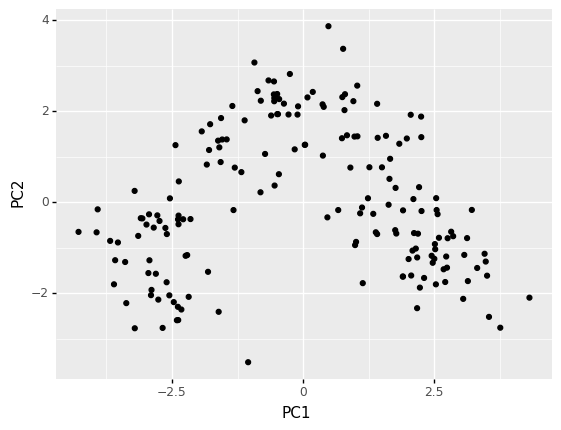

<ggplot: (122061101306)>

In [6]:
(
    ggplot(pca_data)
        +aes(x="PC1",y="PC2")
        +geom_point()
)

In [7]:
#Analizando los componentes
principal_components_data = pd.DataFrame(pca.components_.transpose(),columns=["PC1","PC2"])
principal_components_data['varNames'] = wine.feature_names
principal_components_data

,PC1,PC2,varNames
0,0.144329,-0.483652,alcohol
1,-0.245188,-0.224931,malic_acid
2,-0.002051,-0.316069,ash
3,-0.239320,0.010591,alcalinity_of_ash
4,0.141992,-0.299634,magnesium
5,0.394661,-0.065040,total_phenols
6,0.422934,0.003360,flavanoids
7,-0.298533,-0.028779,nonflavanoid_phenols
8,0.313429,-0.039302,proanthocyanins
9,-0.088617,-0.529996,color_intensity


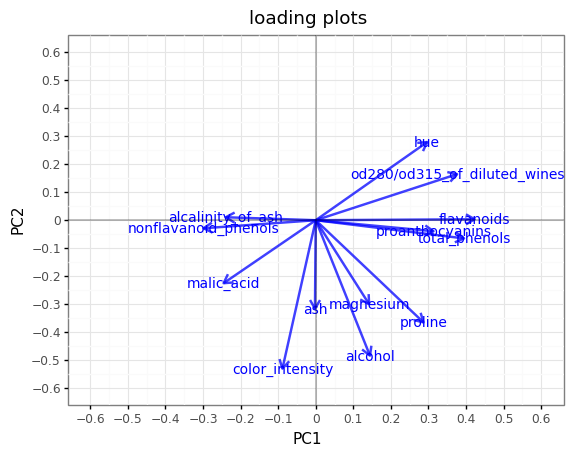

<ggplot: (122078032881)>

In [33]:
(
    ggplot(principal_components_data)
      +theme_bw()
      +labs(title="loading plots")
      +geom_text(aes(x="PC1", y="PC2", label="varNames"), size = 10, color="blue")
      +geom_segment(aes(x=0, y=0, xend="PC1", yend="PC2"), arrow=arrow(length=0.1),size=1, alpha=0.75, color="blue")
      +scale_x_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])
      +scale_y_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])
      +geom_hline(yintercept = 0, size=.2)
      +geom_vline(xintercept = 0, size=.2)
      +coord_cartesian([-0.6,0.6],[-0.6,0.6])
)

In [35]:
pca = PCA()
pca.fit(wine_scaled_features)
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [36]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

<AxesSubplot:>

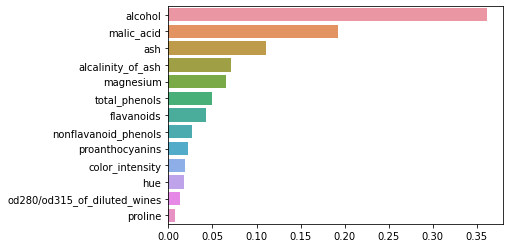

In [37]:
sns.barplot(x=pca.explained_variance_ratio_, y=wine.feature_names)


Con clasificaciones

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2


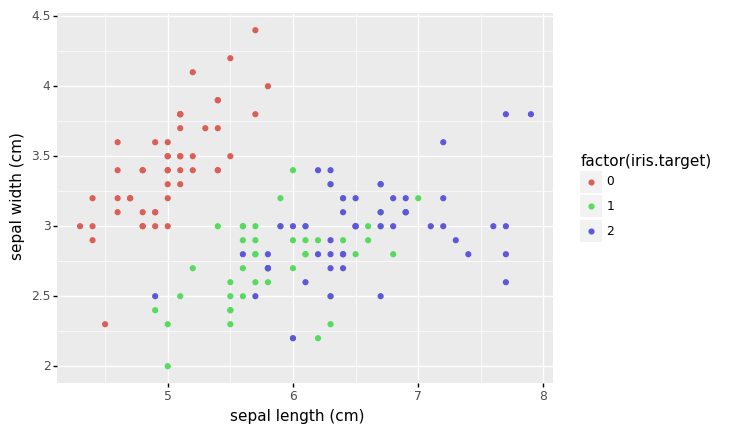

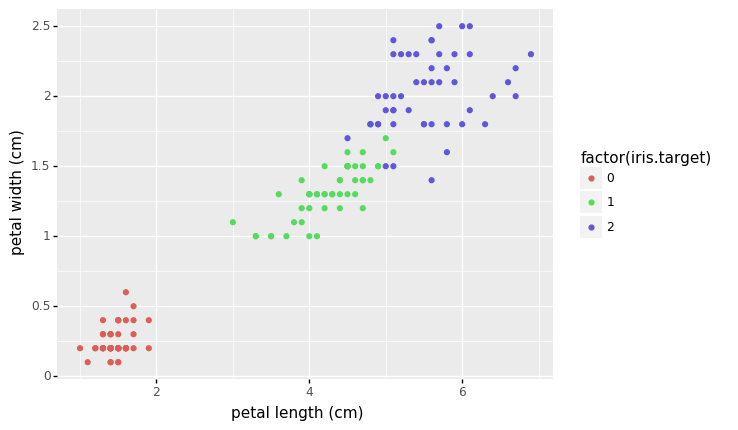

<ggplot: (122078214916)>

In [38]:
iris = datasets.load_iris() #Cargando el dataset de la flor de iris
print(iris.keys()) #Analizando las variables que tiene

tempDF=pd.DataFrame(iris.data,columns=iris.feature_names)
print(tempDF.head(2))
print(ggplot(tempDF)+aes(x="sepal length (cm)", y="sepal width (cm)",color="factor(iris.target)")+ geom_point())
(ggplot(tempDF)+aes(x="petal length (cm)", y="petal width (cm)",color="factor(iris.target)")
 +geom_point())

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.33,random_state=42)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3,weights="uniform")
#El objeto ha sido creado

#Entrenando el modelo con los datos de iris
KNN=KNN.fit(X_train,y_train)


#Aplicando el modelo a otros datos
resultado=KNN.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

#Aplicando el modelo a otros datos
resultado=KNN.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado)

#Aplicando el modelo a otros datos
vecinos=KNN.kneighbors(X_test[0:2,:],3,True)
print("Resultado de los vecinos cercanos:\n",vecinos)

#Observando los labels de los vecinos más cecanos
print(y_train[vecinos[1]])

Resultado de la predicción:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Resultado original:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
Resultado de la predicción:
 [[0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         0.66666667 0.33333333]
 [0.         1.         0.        ]
 [0.         0.33333333 0.66666667]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.     

In [18]:
pd_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
pd_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
X_test2 = iris.data
X_test2

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [42]:
resultado2=KNN.predict(X_test2)
resultado2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

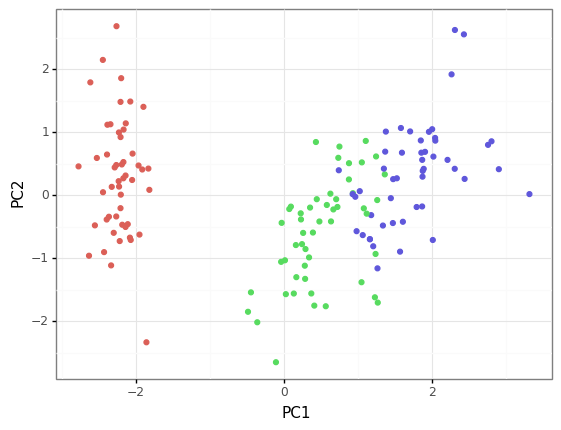

<ggplot: (122078248897)>

In [43]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris.data)
pcai = PCA(n_components=2)
pcai.fit(scaled_features)
tempData = pcai.transform(scaled_features)

tempData = pd.DataFrame(tempData,columns=["PC1","PC2"])
tempData["labels"]=resultado2
ggplot(tempData[tempData['PC2'] < 10])+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point(show_legend=False)+theme_bw()

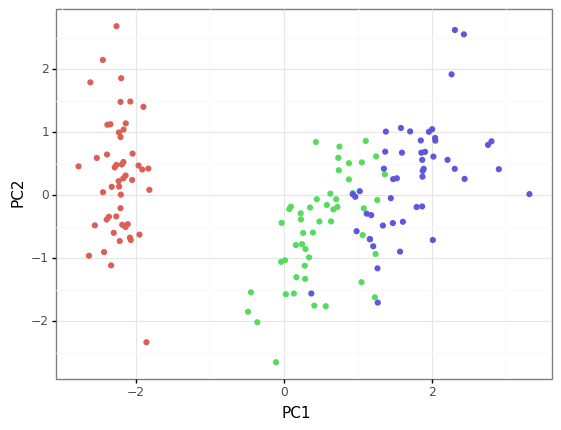

<ggplot: (122077904887)>

In [29]:
tempData["labels"]=iris.target
ggplot(tempData[tempData['PC2'] < 10])+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point(show_legend=False)+theme_bw()

<AxesSubplot:>

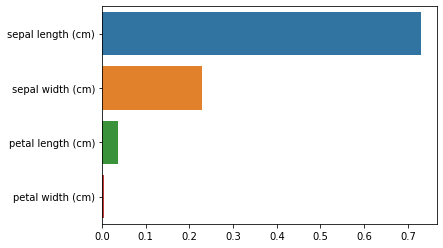

In [44]:
pca = PCA()
pca.fit(scaled_features)
#pca.explained_variance_ratio_
sns.barplot(x=pca.explained_variance_ratio_, y=iris.feature_names)

In [46]:
print(iris.feature_names ,
pca.explained_variance_ratio_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] [0.72962445 0.22850762 0.03668922 0.00517871]
